## Adaptive Metabolic Strategy in consumer resource Models

Adaptive strategy models simulate how microbes adjust their resource uptake over time based on environmental conditions and internal constraints. 
Instead of fixed preferences, organisms dynamically shift their metabolic effort—capturing key behaviors like diauxic growth, cross-feeding, and competition. This approach links metabolic flexibility with ecological dynamics, offering insights into microbial survival and community assembly.

Here we adopt metabolic strategies implemented by [Picciani-mori et., al 2020](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007896)

### Population dynamics
$$\frac{d n_{\sigma}}{dt} = n_{\sigma} \left( \sum_{i=1}^{p} v_i a_{\sigma i} r_i(c_i) - d_{\sigma} \right)$$


### Resourc dynamics
$$\frac{d c_i}{dt} = s_i - \sum_{\sigma=1}^{m} n_{\sigma} a_{\sigma i} r_i(c_i) - \mu_i c_i$$


where:
- $n_{\sigma}$  = population density of species  $\sigma $.
- $ c_i$  = concentration of resource  $i$ .
- $d_{\sigma}$  = death rate of species  $\sigma$ .
- $r_i(c_i) = \frac{c_i}{K_i + c_i} $ is the Monod function describing resource uptake.
- $a_{\sigma i}$  is the metabolic strategy for species  $\sigma $ on resource $ i$ .
- $v_i $ = resource value (growth efficiency per unit of resource).
- $ s_i $  = supply rate of resource  $i $.
- $ \mu_i$  = degradation rate of resource  $i$ .

### Introducing dynamic adaptation strategy

$$\frac{d a_{\sigma i}}{dt} = a_{\sigma i} \lambda_{\sigma} v_i r_i - \Theta(\phi(\mathbf{a_{\sigma}})) \frac{\sum_{k=1}^{p} a_{\sigma k}}{E_{\sigma}^*} \sum_{j=1}^{p} v_j r_j a_{\sigma j}$$


where:
- The adaptation term  $a_{\sigma i} \lambda_{\sigma} v_i r_i $ optimizes metabolic strategy based on the best available resource.
- The penalty term ensures that the total uptake does not exceed species’ metabolic capacity.


### Population dynamics

$$\frac{d n}{dt} = n \left( v_{\text{gal}} a_{\text{gal}} r_{\text{gal}} + v_{\text{eth}} a_{\text{eth}} r_{\text{eth}} - \delta \right)$$

-  n  = population density (cells/mL)
- $v_{\text{gal}}, v_{\text{eth}}$  = resource values (efficiency of resource conversion to biomass)
- $a_{\text{gal}}, a_{\text{eth}}$  = adaptive metabolic strategies (uptake rates)
- $r_{\text{gal}}, r_{\text{eth}}$  = resource uptake rates modeled by a Monod function
- $\delta $ = death rate (1/h)

### Galactose Consumption

$$\frac{d c_{\text{gal}}}{dt} = -n a_{\text{gal}} r_{\text{gal}}$$

- $c_{\text{gal}}$  = galactose concentration (g/mL)
- $a_{\text{gal}} r_{\text{gal}}$  = amount of galactose consumed per unit time

### Ethanol Production and Consumption

$$\frac{d c_{\text{eth}}}{dt} = -n a_{\text{eth}} r_{\text{eth}} + Y \cdot n a_{\text{gal}} r_{\text{gal}}$$

- Ethanol is produced from galactose fermentation (factor  Y ).
- Ethanol is consumed when galactose is depleted.

### Adaptive Galactose Metabolic Strategy

$$\frac{d a_{\text{gal}}}{dt} = a_{\text{gal}} d \delta \left( v_{\text{gal}} r_{\text{gal}} - \Theta \left(\sum_k a_k - E^* \right) \frac{\sum_k a_k}{E^*} \sum_j v_j r_j a_j \right)$$

- The species adjusts its uptake strategy to maximize fitness.
- Heaviside function  \Theta  ensures that total uptake does not exceed metabolic capacity.

### Adaptive Ethanol Metabolic Strategy

$$\frac{d a_{\text{eth}}}{dt} = a_{\text{eth}} d \delta \left( v_{\text{eth}} r_{\text{eth}} - \Theta \left(\sum_k a_k - E^* \right) \frac{\sum_k a_k}{E^*} \sum_j v_j r_j a_j \right)$$

## Plotting yeast culture data

In [1]:
import pandas as pd
from CRM.metabolic_adaptation import *
from cobra.medium import minimal_medium

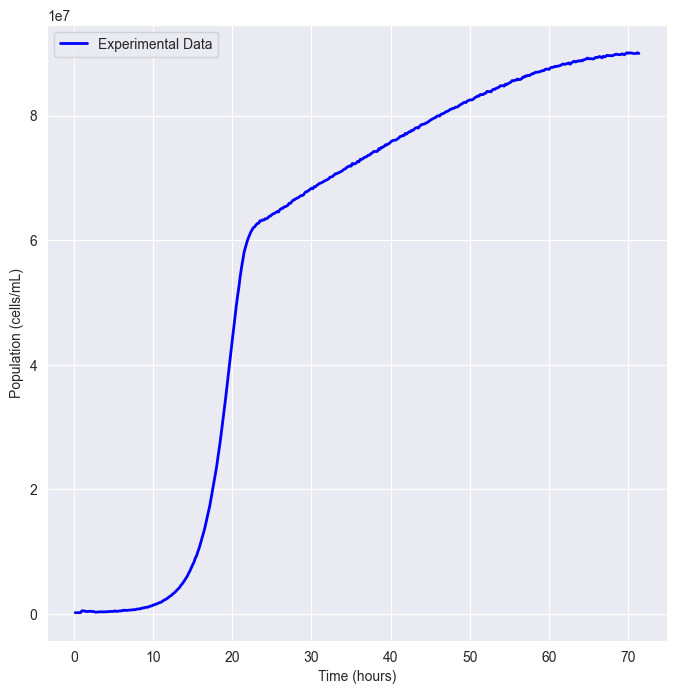

In [2]:
# Load the yeast growth data
file_path = '/Users/edwin/Downloads/yeast_growth_data.csv'  # Replace with your file path
yeast_data = pd.read_csv(file_path)
yeast_data_cleaned = yeast_data[["Time", "MeanDensity"]].iloc[1:]

# Extract time and density data
time_data = yeast_data_cleaned["Time"].values
density_data = yeast_data_cleaned["MeanDensity"].values

# Convert data to numeric for modeling
yeast_data_cleaned["Time"] = pd.to_numeric(yeast_data_cleaned["Time"], errors="coerce")
yeast_data_cleaned["MeanDensity"] = pd.to_numeric(yeast_data_cleaned["MeanDensity"], errors="coerce")
yeast_data_cleaned = yeast_data_cleaned.dropna()

# Extract relevant columns
time = yeast_data['Time']
mean_density = yeast_data['MeanDensity']
std_dev = yeast_data['Standard deviation']

# Plot experimental data and MCMC simulation
plt.figure(figsize=(8, 8))
# Plot the mean density as a line
plt.plot(time, mean_density, label="Experimental Data", color='blue', linewidth=2)
plt.ylabel('Population (cells/mL)')
plt.xlabel("Time (hours)")
plt.legend()
plt.show()

## Adoptive model exhibit diauxic shift in yeast

In [3]:
# Single-species (original diauxic shift) 
params_single = {
    'v_gal': 1.20e10,
    'v_eth': 1.25e10,
    'K_gal': 1.e-3,
    'K_eth': 9.67e-3,
    'Y': 0.53,
    'Q': 2.18e-5,
    'delta': 2.15e-6,
    'd': 2.0e-6,
}

initial_conditions_single = [1e6, 5e-3, 0.0, 0.7e-11, 3.75e-12]
t = np.linspace(0, 71, 1000)
sim_single = AdaptiveMetabolicSimulator(params_single, initial_conditions_single, t, mode='single')
t, sol = sim_single.run(plot=False)

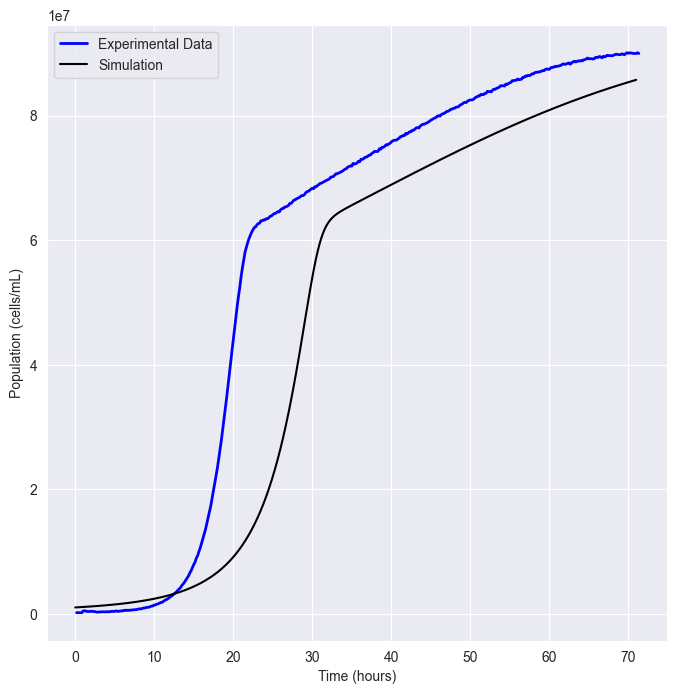

In [4]:
# Plot experimental data and MCMC simulation
plt.figure(figsize=(8, 8))

# Plot the mean density as a line
plt.plot(time, mean_density, label="Experimental Data", color='blue', linewidth=2)
plt.plot(t, sol[:, 0], label='Simulation', color='black')
plt.ylabel('Population (cells/mL)')
plt.xlabel("Time (hours)")
plt.legend()
plt.show()

## Adaptive model for multiple species

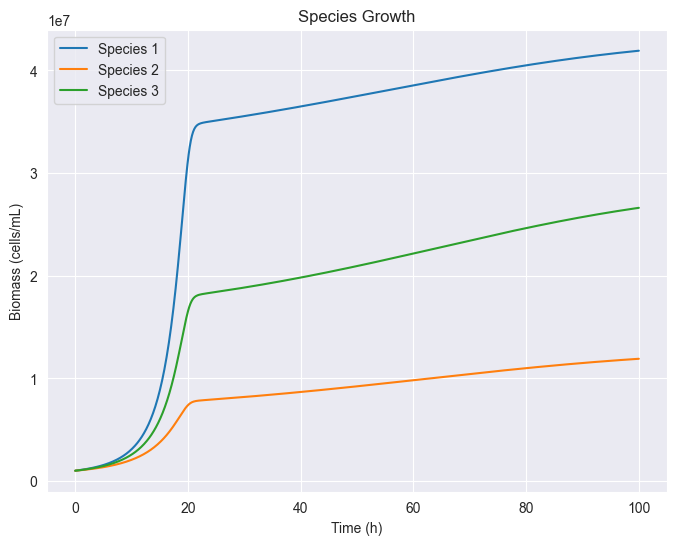

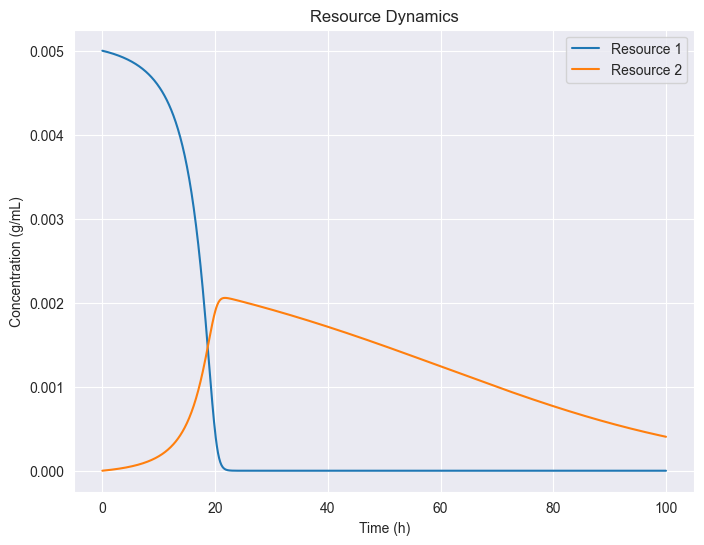

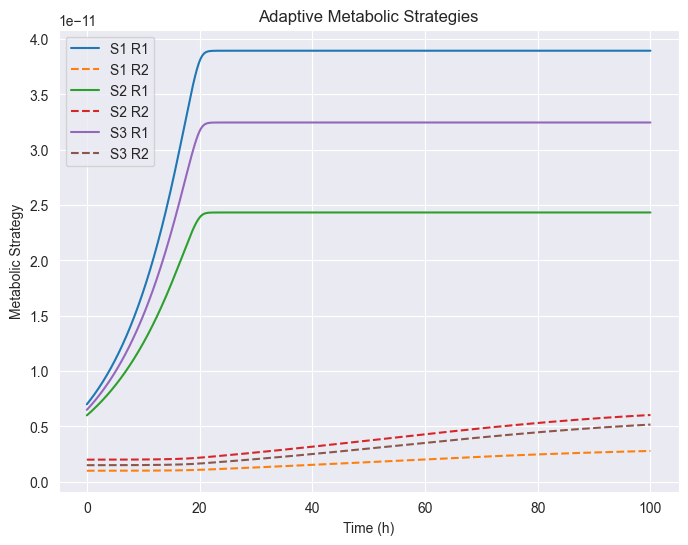

In [5]:
S, R = 3, 2
t = np.linspace(0, 100, 1000)

params_multi = {
    'v': np.array([[1.2e10, 1.1e10],   # Species 1
                   [1.0e10, 1.3e10],   # Species 2
                   [1.1e10, 1.2e10]]), # Species 3
    'K': np.array([[1e-3, 9e-3],
                   [1.1e-3, 1e-2],
                   [0.9e-3, 8e-3]]),
    'Y': np.array([0.5, 0.4, 0.3]),   # Ethanol yield from R0
    'Q': np.full(S, 2.1e-5),
    'delta': np.full(S, 2.15e-6),
    'd': np.full(S, 4.2e-6)
}

n0 = np.full(S, 1.0e6)
c0 = np.array([5e-3, 0.0])  # Initial resources
a0 = np.array([[0.7e-11, 1e-12], [0.6e-11, 2e-12], [0.65e-11, 1.5e-12]])
initial_conditions_multi = np.concatenate([n0, c0, a0.flatten()])

sim_multi = AdaptiveMetabolicSimulator(params_multi, initial_conditions_multi, t, mode='multi')
t, sol = sim_multi.run(plot=True)

## Adaptive model with cross-feeding

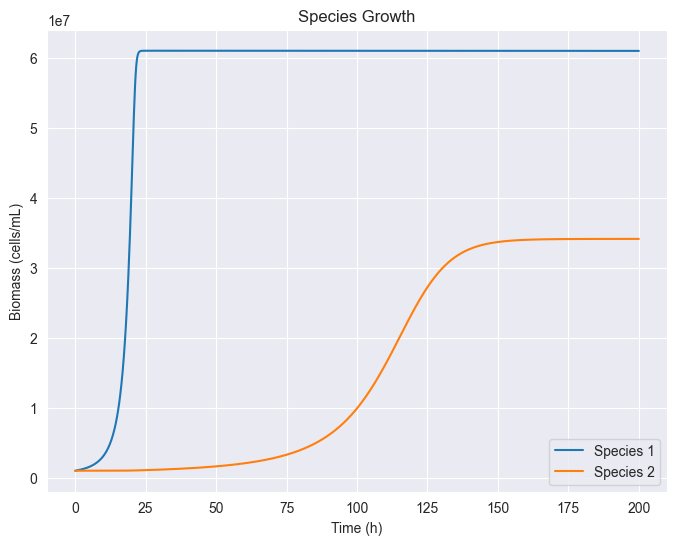

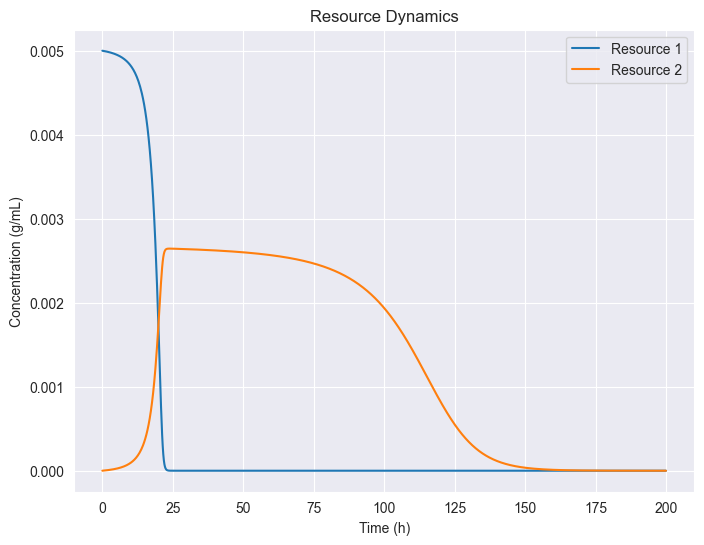

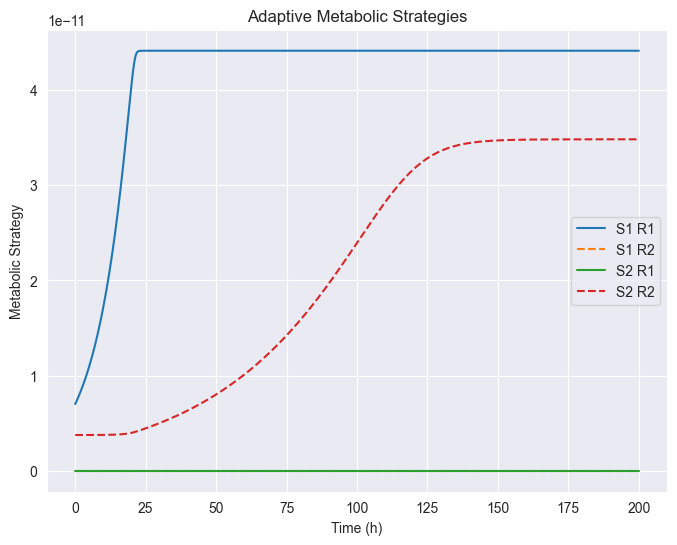

In [6]:
S, R = 2, 2
t = np.linspace(0, 200, 1000)

params_crossfeeding = {
    'v': np.array([[1.20e10, 0.0],     # Species 1: only galactose
                   [0.0, 1.25e10]]),   # Species 2: only ethanol
    'K': np.array([[1e-3, 0.0],
                   [0.0, 9.67e-3]]),
    'Y': np.array([0.53, 0.0]),  # Only species 1 produces ethanol
    'Q': np.array([2.18e-5, 2.1e-5]),
    'delta': np.array([2.15e-6, 2.2e-6]),
    'd': np.array([4.20e-6, 4.00e-6])
}

n0 = np.array([1.0e6, 1.0e6])
c0 = np.array([5.0e-3, 0.0])  # Start with galactose
a0 = np.array([[0.7e-11, 0.0], [0.0, 3.75e-12]])
initial_conditions_crossfeeding = np.concatenate([n0, c0, a0.flatten()])

sim_cross = AdaptiveMetabolicSimulator(params_crossfeeding, initial_conditions_crossfeeding, t, mode='crossfeeding')
t, sol = sim_cross.run(plot=True)

## Predicting culture data set using dfba

In [25]:
mod = read_sbml_model("/Users/edwin/Downloads/iMM904.xml")	

In [26]:
media = mod.medium

In [27]:
del media['EX_glc__D_e']

In [28]:
media['EX_gal_e'] = 100
media['EX_etoh_e'] = 0

In [29]:
mod.medium	= media

In [30]:
media

{'EX_fe2_e': 999999.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 2.0,
 'EX_pi_e': 999999.0,
 'EX_gal_e': 100,
 'EX_etoh_e': 0}

In [31]:
mod.optimize()

,fluxes,reduced_costs
CITtcp,0.000000,1.917619e-18
13BGH,0.000000,-4.395907e-02
13BGHe,0.000000,-6.876478e-19
13GS,2.587771,-4.852882e-18
16GS,0.000000,-8.791813e-02
...,...,...
PYDXO,0.000000,3.174737e-18
PYK,184.071121,4.285385e-16
PYNP2r,0.000000,0.000000e+00
PYR5CDm,0.000000,-5.401005e-18


In [32]:
mod.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
gal_e,EX_gal_e,100,6,100.00%
nh4_e,EX_nh4_e,12.76,0,0.00%
o2_e,EX_o2_e,2,0,0.00%
pi_e,EX_pi_e,0.4508,0,0.00%
so4_e,EX_so4_e,0.1763,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-168.9,1,32.61%
etoh_e,EX_etoh_e,-167.1,2,64.53%
h2o_e,EX_h2o_e,-32.7,0,0.00%
h_e,EX_h_e,-18.89,0,0.00%


/Users/edwin/PycharmProjects/CRM/venv/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


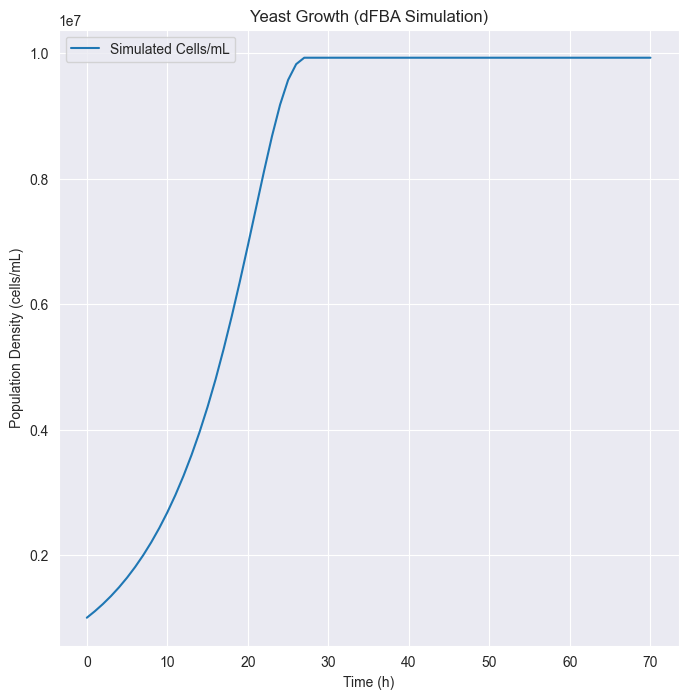

In [39]:
# Convert fluxes to population densities
gDW_per_cell = 4.765e-11
initial_cells_per_ml = 1e6
initial_biomass = initial_cells_per_ml * gDW_per_cell

# Setup
initial_conditions = {
    "biomass": initial_biomass,    # gDW/mL
    "galactose": 5.0e-3,
    "ethanol": 0.0                 #mmol/L (≈ mM)
}

# Map exchange reactions (you can add more)
substrate_to_reaction_map = {
    "galactose": "EX_gal_e",
    "ethanol": "EX_etoh_e"
}

# Kinetic parameters: Km (mM), Vmax (mmol/gDW/h)
kinetic_params = {
    "galactose": (1.e-3,1),
    "ethanol": (9.67e-3,1)
}

# Biomass tracking
biomass_name_map = ("biomass", "BIOMASS_SC5_notrace")

# Run simulation
results = perform_dfba(
    mod,
    initial_conditions,
    kinetic_params,
    substrate_to_reaction_map,
    biomass_name_map,
    dt=1.5,
    total_steps=70
)

# Convert gDW/mL to cells/mL
cells_per_ml = [x / gDW_per_cell for x in results["biomass"]]

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(range(71), cells_per_ml, label="Simulated Cells/mL")
plt.xlabel("Time (h)")
plt.ylabel("Population Density (cells/mL)")
plt.title("Yeast Growth (dFBA Simulation)")
plt.legend()
plt.grid(True)
plt.show()

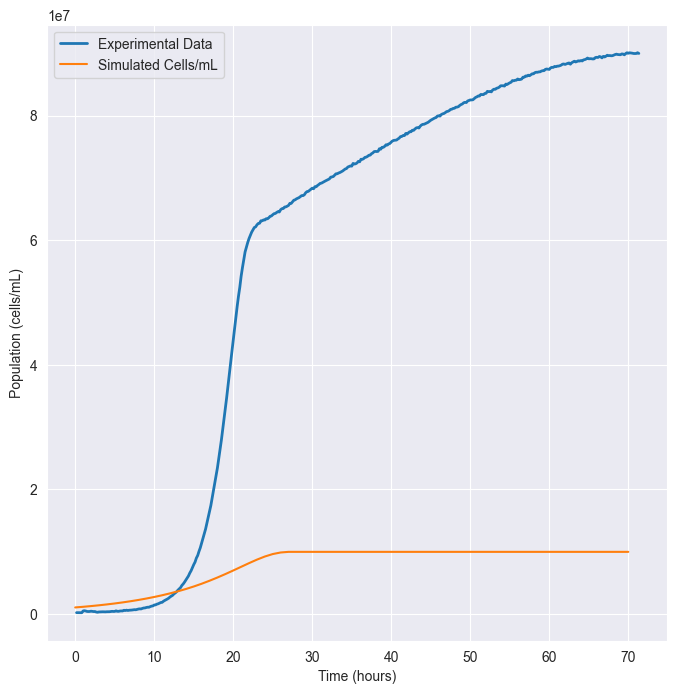

In [40]:
# Plot experimental data and simulation
plt.figure(figsize=(8, 8))
# Plot the mean density as a line
plt.plot(time, mean_density, label="Experimental Data", linewidth=2)
plt.plot(range(71), cells_per_ml, label="Simulated Cells/mL")
plt.ylabel('Population (cells/mL)')
plt.xlabel("Time (hours)")
plt.legend()
plt.show()